<a href="https://colab.research.google.com/github/AlexLeoShin/SeminarGit/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8_1_2_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_%D0%B8%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D0%B8%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Работа с данными
import pandas as pd
import numpy as np

# Визуализация
import matplotlib.pyplot as plt
import seaborn as sns

# Машинное обучение
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    mean_absolute_percentage_error
)

Ниже перечислены все библиотеки, которые применяются в работе, и их назначение.

**1. pandas**
Используется для загрузки, хранения и обработки табличных данных  
(чтение, фильтрация, статистика, работа с колонками).

**2. numpy**
Базовая библиотека для численных вычислений: массивы, математические операции.

**3. matplotlib.pyplot**
Основная библиотека для построения графиков (линейные графики, гистограммы, scatter-плоты).

**4. seaborn**
Надстройка над matplotlib.  
Позволяет строить более красивые и информативные графики (heatmap, pairplot, regplot и т.д.).

**5. scikit-learn (sklearn)**  
Используется для построения моделей машинного обучения.

*Основные модули:*

- **train_test_split** — разделение данных на обучающую и тестовую выборки;
- **StandardScaler** — нормализация признаков;
- **LinearRegression** — линейная регрессия;
- **r2_score, mean_absolute_error, mean_squared_error** — оценка качества модели;
- другие инструменты для предсказаний и анализа.

In [14]:
# Загрузка файла
df = pd.read_csv("/content/drive/MyDrive/Статистический_анализ_данных/heart3.csv")

# Описательные статистики

##**Центральные тенденции**

Для всех числовых признаков вычислите:

- среднее (mean);
- медиану (median);
- моду (mode).


---


Оформите всё в виде таблицы.  
Сделайте вывод: где среднее и медиана различаются сильнее всего.

- Среднее (mean): Сумма всех значений, деленная на их количество. Чувствительно к выбросам.

- Медиана (median): Среднее значение, если все значения отсортированы. Менее чувствительна к выбросам.

- Мода (mode): Наиболее часто встречающееся значение.


###***комментарии только для меня***

•	**Различия между средним и медианой:** Если среднее и медиана сильно отличаются, это указывает на то, что данные, скорее всего, не распределены симметрично (имеют асимметричное распределение) или содержат выбросы.

**Например:**

*Если среднее значительно больше медианы, это обычно означает, что есть несколько очень больших значений (выбросов) или распределение скошено вправо.*

*Если медиана значительно больше среднего, это может указывать на наличие очень малых значений (выбросов) или скошенность распределения влево.*

**Примеры в таблице:**

*Для **'Возраст алког'** среднее (32.2) значительно выше медианы (20.0). Это говорит о том, что большинство людей начинают употреблять алкоголь в более молодом возрасте около 20 лет, но есть некоторое количество людей, которые начинают гораздо позже, что поднимает среднее значение вверх.  

Признак - скошенности вправо.

*Аналогичная ситуация наблюдается для **'Возраст курения'** (среднее 60.06, медиана 90.0) и **'Сигарет в день'** (среднее 5.88, медиана 0.0), где среднее намного выше медианы, что также указывает на асимметричное распределение с выбросами в сторону больших значений.*

**Переменные: 'Работа', 'Переломы', 'Выход на пенсию', 'Артериальная гипертония', 'Гепатит', 'Сахарный диабет', 'Спорт, клубы', 'Травмы за год', 'Сон после обеда' и 'Хроническое заболевание легких'** являются бинарными и имеют значения: 0 или 1.

*В таких случаях медиана часто равна 0, если большинство значений равно 0, в то время как среднее показывает долю единиц в данных.*


In [15]:
mean_vals = df.mean(numeric_only=True)
median_vals = df.median(numeric_only=True)
mode_vals = df.mode(numeric_only=True).iloc[0]

summary = pd.DataFrame({
    "Среднее": mean_vals,
    "Медиана": median_vals,
    "Мода": mode_vals
})

summary

,Среднее,Медиана,Мода
Возраст алког,32.206533,20.000000,20.000000
Работа,0.523709,1.000000,1.000000
Переломы,0.353003,0.000000,0.000000
Время пробуждения,6.819810,7.000000,6.000000
ЛПВП,1.070095,1.110000,1.180000
Выход на пенсию,0.335090,0.000000,0.000000
Холестерин,5.868599,5.200000,5.000000
Артериальная гипертония,0.485774,0.000000,0.000000
Триглицериды,2.043393,1.480000,0.710000
Гепатит,0.121180,0.000000,0.000000


**Выводы (дописать):**

По результатам расчёта среднего, медианы и моды видно, что для многих признаков среднее и медиана существенно **различаются**, например, **Возраст алког** и **Возраст курения**. Это обычно говорит о **наличии выбросов или асимметричного распределения данных**.


Такие расхождения подтверждают, что данные содержат признаки с **асимметричными распределениями**, где среднее - неустойчивый показатель, а медиана лучше отражает реальное «центральное» значение.


##**Разброс данных**

Вычислите:

- стандартное отклонение (std);
- дисперсию (var);
- коэффициент вариации;
- размах значений.

Оформите результат в таблицу.  
Сделайте вывод: какие признаки имеют наибольший разброс значений.

Метрики выше позволяют количественно оценить, насколько широко данные распределены вокруг центрального значения.

###***комментарии только для меня***

**Выявление признаков с наибольшим разбросом:**

Коэффициент вариации,  позволяет сравнивать изменчивость признаков с разными масштабами.

В таблице видим, что наибольшую изменчивость показывают переменные, такие как **'Травмы за год', 'Спорт, клубы', 'Хроническое заболевание легких', 'Сахарный диабет' и 'Гепатит'**.

*Эти признаки часто являются бинарными или имеют очень сильную асимметрию, где большинство значений сосредоточено в одном месте, а небольшое количество значений сильно отклоняется.*

**И НАОБОРОТ.** Наименьший разброс наблюдается у признаков: **'Время засыпания', 'Абдоминальное ожирение, см', 'Индекс массы тела, кг/м^2', 'Образование' и 'Продолжительность сна'.**

*Эти признаки более сконцентрированы вокруг своего среднего значения.*

In [16]:
std_vals = df.std(numeric_only=True)
var_vals = df.var(numeric_only=True)
cv_vals = df.std(numeric_only=True) / df.mean(numeric_only=True)
range_vals = df.max(numeric_only=True) - df.min(numeric_only=True)

dispersion_summary = pd.DataFrame({
    "Стандртное отклонение": std_vals,
    "Дисперсия": var_vals,
    "Коэффициент вариации": cv_vals,
    "Размах": range_vals
})

dispersion_summary

,Стандртное отклонение,Дисперсия,Коэффициент вариации,Размах
Возраст алког,26.942616,725.904556,0.836557,84.000000
Работа,0.499701,0.249701,0.954157,1.000000
Переломы,0.478156,0.228633,1.354537,1.000000
Время пробуждения,1.364942,1.863067,0.200144,12.000000
ЛПВП,0.368732,0.135963,0.344579,2.470000
Выход на пенсию,0.472271,0.223040,1.409386,1.000000
Холестерин,1.667100,2.779224,0.284071,5.600000
Артериальная гипертония,0.500061,0.250061,1.029410,1.000000
Триглицериды,1.704405,2.904996,0.834105,14.090000
Гепатит,0.326509,0.106608,2.694406,1.000000


**Выводы (дописать):**

Разброс значений в датасете сильно различается между признаками.

Наибольшую изменчивость показывают переменные **Травмы за год, Спорт, клубы, Хроническое заболевание легких, Сахарный диабет и Гепатит**. Их значения распределены очень неравномерно.

Наименьший разброс наблюдается у **Время засыпания, Абдоминальное ожирение, см, Образование, Индекс массы тела, кг/м^2 и Продолжительность сна.**

В целом, признаки с большим разбросом требуют нормализации перед моделированием, чтобы избежать доминирования над переменными с низкой вариативностью.








##**Положение данных**

Для каждого числового признака вычислите:

- минимум (min);
- максимум (max);  
- 1-й, 2-й и 3-й квартили (quantile).

Сгруппируйте всё в таблицу.  
Сделайте вывод: есть ли признаки, которые сильно растянуты вдоль оси.

###***комментарии только для меня***

**Наличие признаков, сильно растянутых вдоль оси.**

1. Категориальные переменные: **Национальность, Религия, Семья, Профессия**

2. Поведенческие показатели: **Возраст алког, Алкоголь, Возраст курения, Сигарет в день.**


In [24]:
min_vals = df.min(numeric_only=True)
max_vals = df.max(numeric_only=True)
q1_vals = df.quantile(0.25, numeric_only=True)
q2_vals = df.quantile(0.5, numeric_only=True)
q3_vals = df.quantile(0.75, numeric_only=True)

position_summary = pd.DataFrame({
    "Минимум": min_vals,
    "1 квартиль (25%)": q1_vals,
    "2 квартиль (50%, медиана)": q2_vals,
    "3 квартиль (75%)": q3_vals,
    "Максимум": max_vals
})

position_summary

,Минимум,1 квартиль (25%),"2 квартиль (50%, медиана)",3 квартиль (75%),Максимум
Возраст алког,6.000000,18.000000,20.000000,25.000000,90.000000
Работа,0.000000,0.000000,1.000000,1.000000,1.000000
Переломы,0.000000,0.000000,0.000000,1.000000,1.000000
Время пробуждения,0.000000,6.000000,7.000000,8.000000,12.000000
ЛПВП,-0.680000,0.850000,1.110000,1.340000,1.790000
Выход на пенсию,0.000000,0.000000,0.000000,1.000000,1.000000
Холестерин,3.600000,4.500000,5.200000,7.300000,9.200000
Артериальная гипертония,0.000000,0.000000,0.000000,1.000000,1.000000
Триглицериды,0.210000,0.860000,1.480000,2.690000,14.300000
Гепатит,0.000000,0.000000,0.000000,0.000000,1.000000


**Выводы (дописать):**

По минимумам, квартилям и максимумам видно, что несколько признаков имеют очень широкий диапазон значений и сильно растянуты вдоль оси. Это в первую очередь кодированные категориальные переменные: **Национальность, Религия, Семья, Профессия** и поведенческие показатели: **Возраст алког, Алкоголь, Возраст курения, Сигарет в день**.

Бинарные признаки (0/1) — самые компактные и не имеют растяжения.

В целом, признаки с большим размахом требуют масштабирования перед построением моделей, чтобы их диапазон не доминировал над остальными переменными.








# Корреляция и Линейная регрессия

## Корреляция

**Корреляция** — это статистическая мера, показывающая, насколько сильно и в каком направлении связаны две количественные переменные.

Если при увеличении одной переменной другая тоже увеличивается — связь положительная; если уменьшается — отрицательная.

Коэффициент корреляции обозначается **r** и принимает значения от **–1 до 1**:

| Значение r | Интерпретация связи |
|-------------|--------------------|
| r ≈ 1 | Сильная положительная связь (при росте X растёт Y) |
| r ≈ 0 | Связь отсутствует |
| r ≈ –1 | Сильная отрицательная связь (при росте X уменьшается Y) |


**Виды корреляции:**
- **Пирсон** — измеряет *линейную* зависимость между переменными;  
- **Спирмен** — оценивает, растут ли переменные “вместе” в целом, даже если зависимость не по прямой линии.

**Важно:** корреляция показывает лишь *совместное изменение переменных*, но не доказывает причинно-следственную связь.

## Линейная регрессия

**Линейная регрессия** — один из самых простых и распространённых методов анализа данных.  
Её цель — **предсказать значение одной переменной (целевой)** на основе значений других переменных (признаков).

Математическая модель имеет вид:

**y = b₀ + b₁·x₁ + b₂·x₂ + ... + bₙ·xₙ**

где  
- **y** — предсказываемое значение (целевая переменная);  
- **x₁, x₂, …, xₙ** — признаки (факторы, влияющие на результат);  
- **b₀** — свободный член (точка пересечения с осью Y);  
- **bᵢ** — коэффициенты регрессии, показывающие силу и направление влияния каждого признака.

---

Интерпретация коэффициентов:

- Если **bᵢ > 0** → при увеличении признака значение цели **растёт**.  
- Если **bᵢ < 0** → при увеличении признака значение цели **уменьшается**.  
- Чем больше по модулю **bᵢ**, тем сильнее влияние признака.

---

Пример уравнения регрессии:

**Холестерин = 120 + 1.5 · Возраст + 2.8 · ИМТ**

Интерпретация коэффициентов:

- если **возраст увеличивается на 1 год**, уровень холестерина в среднем повышается на **1.5 единицы**;
- если **ИМТ увеличивается на 1 пункт**, уровень холестерина растёт примерно на **2.8 единицы**;
- число **120** — это базовое значение холестерина у пациента с низким ИМТ и минимальным возрастом  
  (условная точка отсчёта, от которой модель строит прогноз).

Такое уравнение помогает понять вклад каждого признака в итоговый показатель и увидеть,
как изменения входных переменных отражаются на прогнозе модели.

---

Виды линейной регрессии:

1. **Простая линейная регрессия** — один признак → одна цель  
   `y = b₀ + b₁·x`
2. **Множественная линейная регрессия** — несколько признаков → одна цель  
   `y = b₀ + b₁·x₁ + b₂·x₂ + ... + bₙ·xₙ`

---

Почему линейная регрессия важна:

- помогает понять, **какие признаки влияют** на результат;  
- даёт **интерпретируемую модель**, где каждый коэффициент имеет смысл;  
- позволяет **делать прогнозы** и **оценивать взаимосвязи** в данных.

---

## Практическое задание

### Корреляция

###Шаг 1. Рассчитайте матрицу корреляции методом Пирсона (`df.corr(method="pearson")`).

In [28]:
corr_pearson = df.corr(numeric_only=True, method="pearson") # добавить код
corr_pearson.round(2)

,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,Гепатит,...,Сон после обеда,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Религия,Профессия,ССЗ,Продолжительность сна
Возраст алког,1.00,-0.09,-0.04,-0.09,0.04,0.08,0.08,0.04,0.08,-0.06,...,-0.02,0.03,0.00,-0.21,-0.04,0.06,0.04,0.04,0.04,-0.11
Работа,-0.09,1.00,-0.06,-0.16,0.07,-0.74,-0.19,-0.19,-0.13,0.02,...,-0.15,-0.04,0.00,0.08,0.14,-0.19,-0.03,0.08,-0.22,-0.11
Переломы,-0.04,-0.06,1.00,-0.01,-0.15,0.07,0.11,0.08,0.08,0.03,...,0.05,0.01,0.07,0.07,-0.08,0.12,-0.02,-0.08,0.12,-0.02
Время пробуждения,-0.09,-0.16,-0.01,1.00,0.04,0.10,-0.01,0.02,-0.02,0.02,...,-0.01,0.30,-0.10,-0.05,0.05,-0.03,0.06,-0.02,0.00,0.67
ЛПВП,0.04,0.07,-0.15,0.04,1.00,-0.09,-0.45,-0.55,-0.78,0.02,...,-0.10,-0.03,-0.03,-0.28,0.17,-0.57,0.01,0.13,-0.58,0.06
Выход на пенсию,0.08,-0.74,0.07,0.10,-0.09,1.00,0.22,0.23,0.14,-0.05,...,0.11,0.01,-0.00,-0.13,-0.12,0.22,0.05,-0.06,0.25,0.08
Холестерин,0.08,-0.19,0.11,-0.01,-0.45,0.22,1.00,0.73,0.44,0.01,...,0.04,-0.07,0.07,-0.05,-0.05,0.62,0.06,-0.05,0.79,0.04
Артериальная гипертония,0.04,-0.19,0.08,0.02,-0.55,0.23,0.73,1.00,0.56,-0.03,...,0.05,-0.00,0.05,-0.08,-0.06,0.70,0.08,-0.05,0.88,0.02
Триглицериды,0.08,-0.13,0.08,-0.02,-0.78,0.14,0.44,0.56,1.00,-0.01,...,0.00,0.01,0.03,-0.05,-0.07,0.43,0.07,-0.03,0.56,-0.03
Гепатит,-0.06,0.02,0.03,0.02,0.02,-0.05,0.01,-0.03,-0.01,1.00,...,-0.01,0.00,0.03,0.02,-0.01,-0.03,0.00,-0.05,-0.03,0.02


## **Выводы (дописать):** **Матрица Пирсона (таблица)** послужит основой для дальнейшего анализа взаимосвязей в данных, для понимания, какие признаки склонны изменяться вместе и в каком направлении.

###***комментарии только для меня***


**В матрице каждое значение (кроме главной диагонали) — это коэффициент Пирсона**, который измеряет силу и направление линейной взаимосвязи между двумя переменными.

Хорошо видно, что значения в ячейках варьируются от -1 (а это - сильная отрицательная линейная связь) до 1 (сильная положительная линейная связь).

Значения, близкие к 0, указывают на отсутствие линейной связи.

В матрице Пирсона есть **ГЛАВНАЯ диагональ**, особенностью которой является то, что **ВСЕ** значения на главной диагонали равны 1.0, это корреляция каждого признака с самим собой

**Матрица симметрична относительно главной диагонали**, то есть корреляция между признаком А и признаком В такая же, как между признаком В и признаком А.

**Проблемный признак** - признак **"Частота пасс кур"** у которого значения корреляции равны NaN (Not a Number). Это обычно означает, что данный признак имеет нулевую дисперсию, то есть все его значения одинаковы (является константой). *Для такого признака невозможно рассчитать корреляцию с другими переменными.*



###Шаг 2. Визуализируйте корреляции с помощью графика `seaborn.heatmap`

###***комментарии по коду только для меня***

**sns.heatmap(data = corr_pearson, cmap='coolwarm', center=0, annot=True, fmt=".1f")**

**Действие:** Функция из библиотеки seaborn (sns), которая строит тепловую карту.

**Параметры:**

data = corr_pearson
        
Параметр, который указывает, какие данные нужно визуализировать. Здесь мы передаем ранее рассчитанную матрицу корреляции Пирсона (corr_pearson).
Каждая ячейка этой матрицы содержит коэффициент корреляции между парой признаков.
        
cmap='coolwarm'

Определяет цветовую палитру (colormap) для тепловой карты. Палитра 'coolwarm' очень удобна для корреляций, так как она обычно использует холодные цвета (синий) для отрицательных корреляций, теплые цвета (красный) для положительных корреляций, и нейтральный цвет (белый или светло-серый) для корреляции, близкой к нулю. Это помогает визуально быстро оценить характер связи.
        
        
center=0:

Устанавливает значение, которое будет соответствовать нейтральному цвету в палитре cmap. Для корреляционной матрицы логично установить center=0, чтобы нулевая корреляция (отсутствие линейной связи) отображалась нейтральным цветом, а отклонения в положительную или отрицательную сторону - соответствующими цветами.
        
annot=True

Если этот параметр установлен в True, то на каждой ячейке тепловой карты будут отображаться числовые значения коэффициентов корреляции. Это очень полезно для точного анализа.


fmt=".1f"

Этот параметр определяет формат отображения чисел, когда annot=True. ".1f" означает, что число будет отображено как число с плавающей точкой с одним знаком после запятой.

plt.title("Корреляционная матрица (Пирсон)")

**Действие:** Эта строка устанавливает заголовок для нашего графика.
   
**Параметры:**
        "Корреляционная матрица (Пирсон)": Текст, который будет отображаться в качестве заголовка графика.

plt.show()

**Действие:** Эта строка отображает созданный график на экране. Без этой команды график может быть создан в памяти, но не показан пользователю.

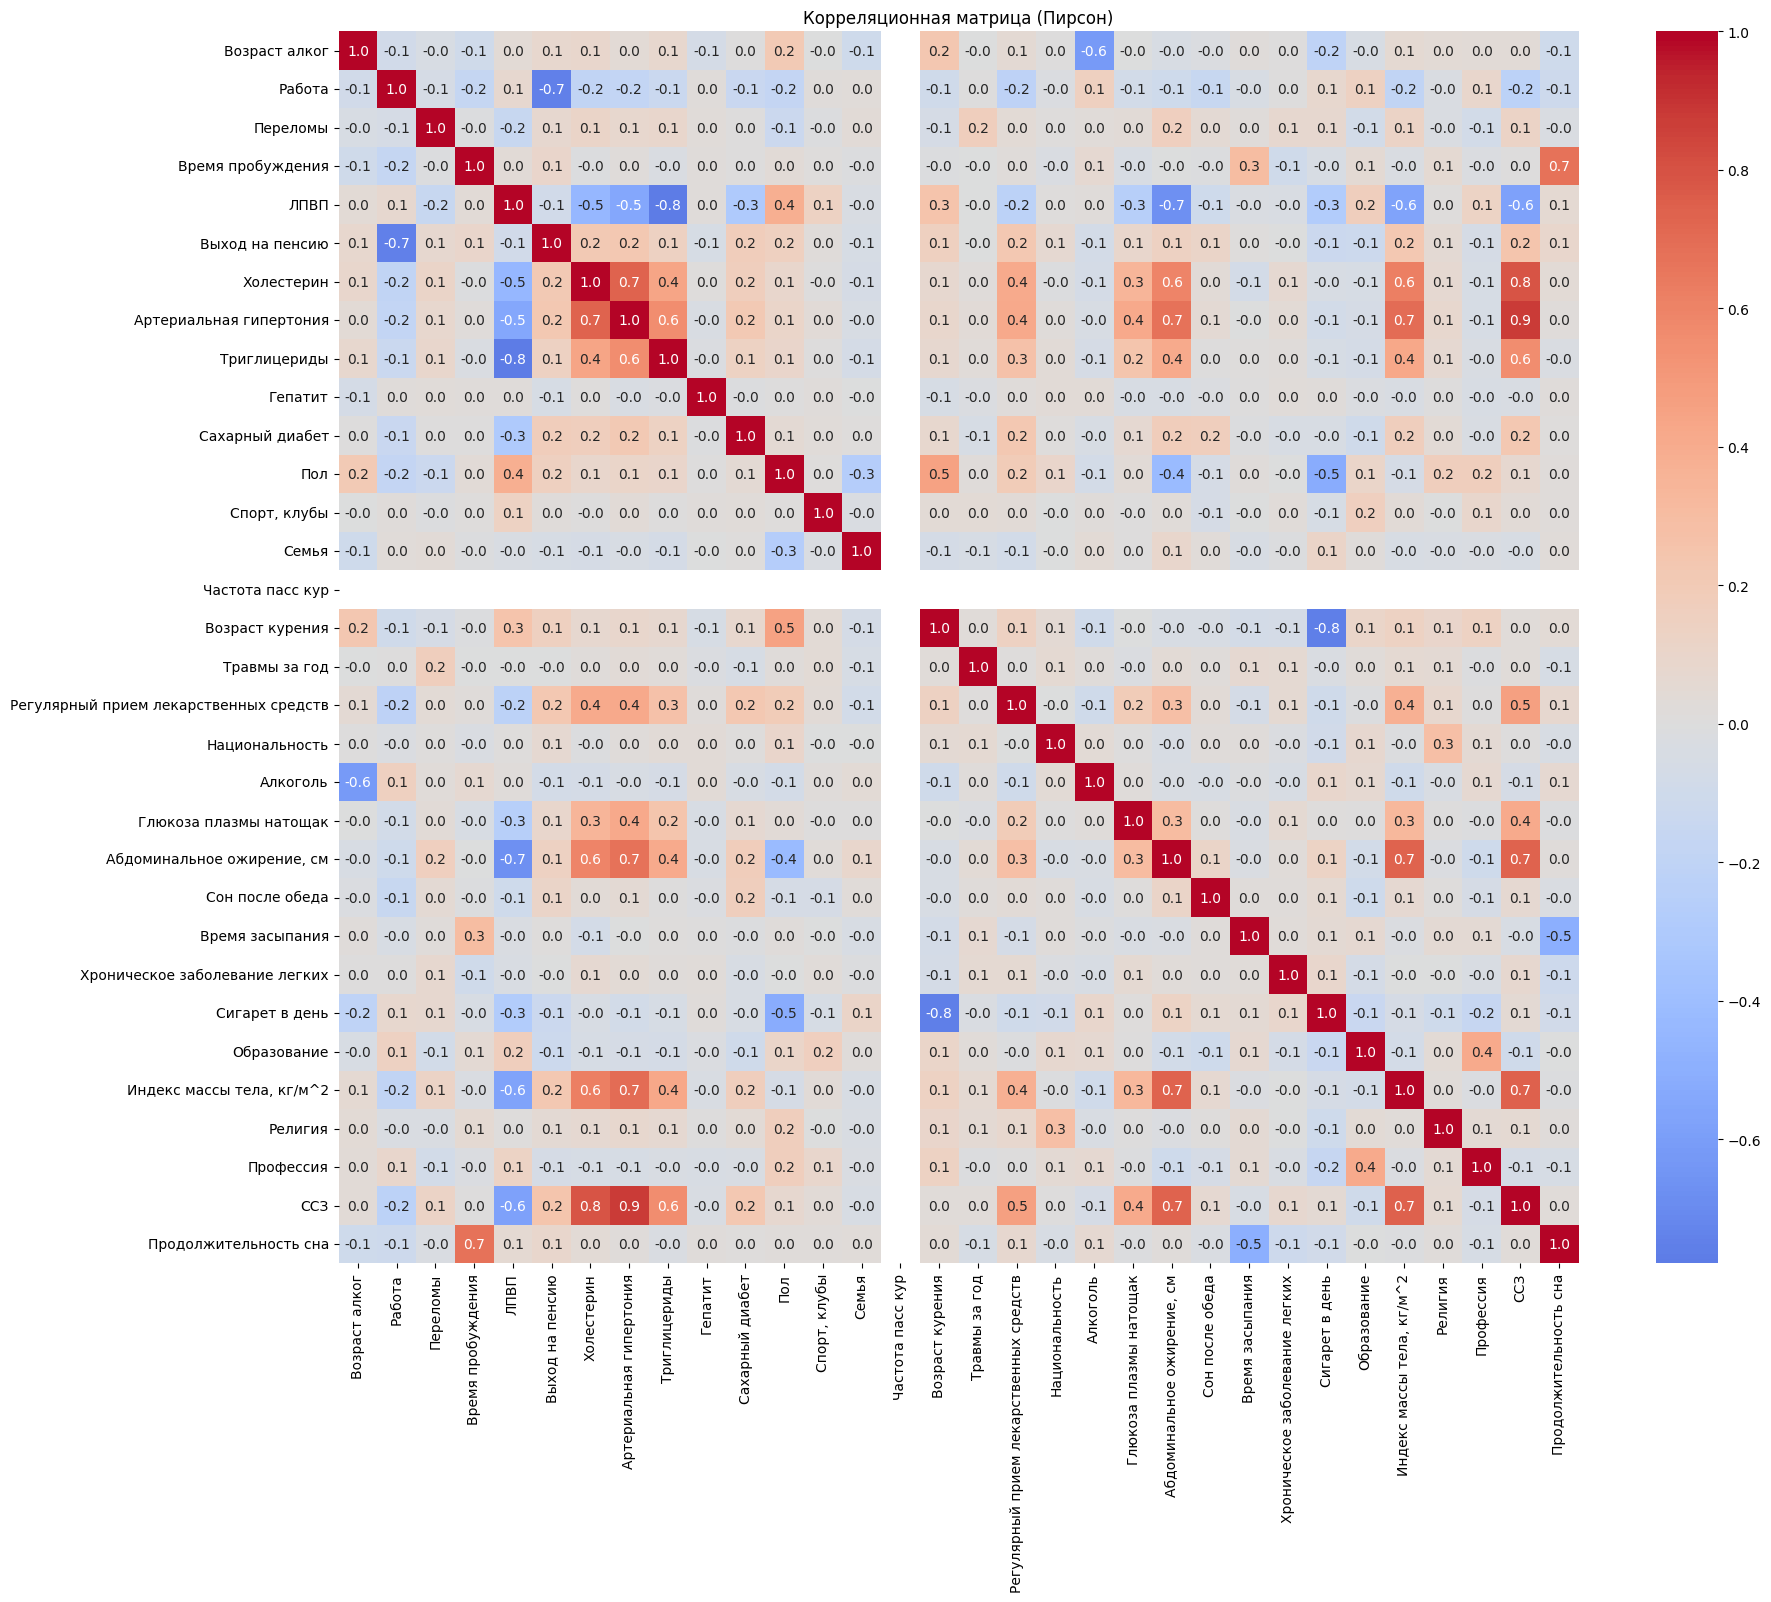

In [30]:
plt.figure(figsize=(20,16))
sns.heatmap(data = corr_pearson, cmap='coolwarm', center=0, annot=True, fmt=".1f") # добавьте после "data =" название матрицы корреляции из предыдущего кода
plt.title("Корреляционная матрица (Пирсон)")
plt.show()

###Шаг 3. Проанализируйте связи с целевой переменной (ЛПВП), постройте график barplot с помощью `seaborn.barplot`. С помощью параметра `ascending=False` в функции `sort_values` переделайте график, чтобы расположить столбцы в порядке убывания.

**комментарий только для меня:**

*метод (ascending=False) указывает, что сортировка должна производиться в порядке убывания (от наибольшего значения к наименьшему).*

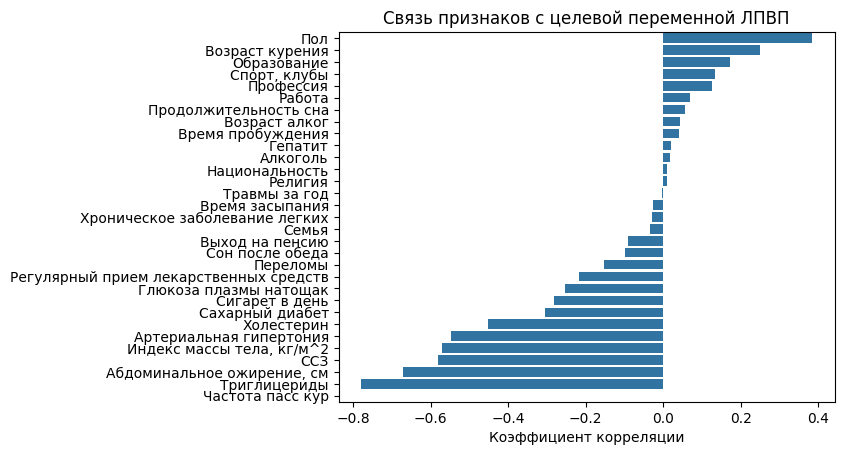

In [29]:
target_corr = corr_pearson["ЛПВП"].drop("ЛПВП").sort_values(ascending=False)
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title("Связь признаков с целевой переменной ЛПВП")
plt.xlabel("Коэффициент корреляции")
plt.ylabel("")
plt.show()


**Выводы (дописать):**

Сильные положительные связи:

- Признак "Пол" — наиболее высокая положительная корреляция с целевой переменной "ЛПВП" (0.38).

- "Возраст курения" также показывает положительную корреляцию (0.25)

Сильные отрицательные связи:

- "Триглицериды" — самая сильная отрицательная корреляция.

- "Абдоминальное ожирение, см" — также выраженная отрицательная зависимость: чем больше окружность живота, тем ниже значение целевой переменной.


**комментарии только для меня**

*Направление связи:*

- Положительная корреляция (столбцы вправо от нуля): При увеличении значения признака, значение "ЛПВП" также имеет тенденцию к увеличению. Чем длиннее столбец вправо, тем сильнее эта положительная связь.
        
- Отрицательная корреляция (столбцы влево от нуля): При увеличении значения признака, значение "ЛПВП" имеет тенденцию к уменьшению. Чем длиннее столбец влево, тем сильнее эта отрицательная связь.
        
- Отсутствие линейной связи (столбцы около нуля): Признаки, у которых столбец очень короткий и находится близко к нулевой отметке, не имеют сильной линейной взаимосвязи с "ЛПВП".


*Сила связи:*
- Чем дальше столбец от нулевой линии (как вправо, так и влево), тем сильнее линейная связь между признаком и "ЛПВП". Например, коэффициент корреляции около 0.7 или -0.7 считается сильной связью, а около 0.1 или -0.1 — очень слабой.


*Примеры и интерпретация (на основе типичных корреляций для "ЛПВП"):*
        
- Сильные отрицательные связи: Если мы увидим длинные столбцы влево, например, для "Триглицериды" или "Абдоминальное ожирение, см", это будет означать, что чем выше уровень триглицеридов или чем больше окружность живота, тем ниже уровень "ЛПВП". Это ожидаемые медицинские корреляции.
        
- Сильные положительные связи: Если будут длинные столбцы вправо, например, для "Пол" (1 - женщина), "Возраст курения" или "Спорт, клубы", это может указывать на то, что эти факторы связаны с более высоким уровнем "ЛПВП".
        
- Слабые/нулевые связи: Признаки, столбцы которых едва заметны или находятся прямо у нуля, практически не имеют линейной взаимосвязи с "ЛПВП" в нашем датасете.


*Важное замечание:*

Корреляция показывает только статистическую взаимосвязь, а не причинно-следственную. Например, высокий уровень корреляции между двумя признаками не означает, что один вызывает другой; может быть третий, ненаблюдаемый фактор, который влияет на оба, или связь может быть случайной. График помогает выявить потенциально важные для дальнейшего анализа признаки.

###Шаг 4. Постройте scatter-график с линией тренда (`seaborn.regplot`) для признака с самой сильной корреляцией с признаком "ЛПВП", сделайте вывод о характере связи.
По оси y возьмите признак "ЛПВП", а по оси x признак с самой высокой корреляцией с "ЛПВП" (подсказка: корреляция отрицательная).

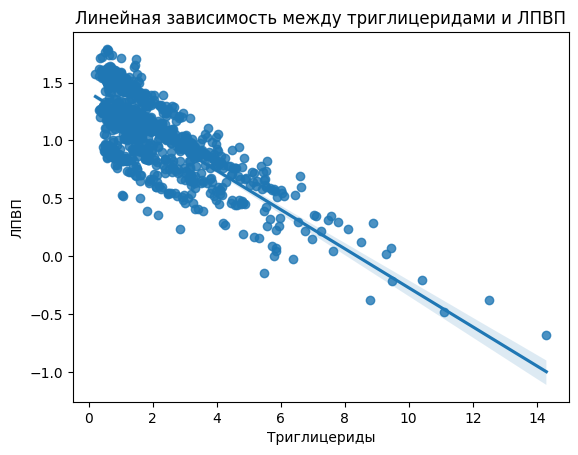

In [31]:
sns.regplot(x=df["Триглицериды"], y=df["ЛПВП"])
plt.title("Линейная зависимость между триглицеридами и ЛПВП")
plt.show()

**Выводы (дописать):**

На графике видна ярко выраженная **отрицательная линейная** зависимость между уровнем триглицеридов и ЛПВП (чем выше уровень триглицеридов, тем ниже уровень ЛПВП)

### Линейная регрессия

Шаг 1. Создайте список features

In [32]:
features = ["Триглицериды"] # добавьте 'Триглицериды'

target = "ЛПВП" # целевая переменная

Шаг 2. Разделите данные на train/test с помошью `train_test_split`.

In [33]:
X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42 # random_state=42 для того, чтобы при повторном запуске модели получить тот же результат
)

Шаг 3. Нормализацизуйте признаки используя `StandardScaler`: обучите scaler на train, примените к train и test, сохраните преобразованные данные.


In [34]:
scaler = StandardScaler()        # создаём объект стандартизации (вычитает среднее, делит на std)
X_train_scaled = scaler.fit_transform(X_train)   # обучаем scaler на train и сразу масштабируем train

X_test_scaled = scaler.transform(X_test)         # масштабируем test теми же параметрами (mean/std)

X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
# превращаем масштабированный train в DataFrame с теми же колонками и индексами

X_test_s = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)
# то же самое для test

Шаг 4. Обучите модель `LinearRegression()` и получите прогноз на тестовых данных.

In [35]:
lin = LinearRegression()
lin.fit(X_train_s, y_train)

LinearRegression()

Шаг 5. Выведите уравнение модели, получая коэффициенты `model.coef_` и свободный член `model.intercept_`.

In [36]:
# Свободный член и коэффициенты
b0 = lin.intercept_
coefs = pd.Series(lin.coef_, index=features)

print("Свободный член (b0):", round(b0, 3))
print()

print("Коэффициенты модели:")
display(coefs.to_frame("Коэффициент").round(3))

# Формирование уравнения модели
terms = [f"{coefs[f]:.3f}·{f}" for f in features]
equation = f"{target} = {b0:.3f} + " + " + ".join(terms)

print("\nУравнение модели:\n")
print(equation)

Свободный член (b0): 1.068

Коэффициенты модели:


,Коэффициент
Триглицериды,-0.28



Уравнение модели:

ЛПВП = 1.068 + -0.280·Триглицериды


Шаг 6. Посчитайте метрики оценки качества (R², MAE, RMSE). Сделайте вывод о качестве модели.

In [37]:
# Предсказания
y_pred = lin.predict(X_test_s)

# Метрики
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R²   = {r2:.3f}")
print(f"MAE  = {mae:.3f}")
print(f"MSE  = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAPE = {mape:.3f}")

R²   = 0.671
MAE  = 0.182
MSE  = 0.048
RMSE = 0.219
MAPE = 0.283


**Выводы:**
- R² (коэффициент детерминации) Показывает, какую долю вариации целевой переменной объясняет модель. 0.671 → модель объясняет 67.1% изменений ЛПВП.
- MAE 0.182 → в среднем модель ошибается на 0.18 единицы ЛПВП.
- MSE средний квадрат ошибки. Чувствителен к большим отклонениям.
0.048 → небольшие крупные ошибки, модель стабильная.
- RMSE — ошибка в тех же единицах, что и целевая переменная.
0.219 → средняя ошибка примерно 0.22 ЛПВП.
- MAPE -
**0.283 → в среднем модель ошибается на 28.3% от фактического значения ЛПВП,отклонение на 28.3% от реальных значений.**

## *Необязательное задание:*

Попробуйте построить две разные модели регрессии для мужчин и женщин, то есть отдельно для `df_0 = df[df['Пол'] == 0]` и `df_1 = df[df['Пол'] == 1]`. Как это повлияло на качество результата?

Для `df_0 = df[df['Пол'] == 0]`:

In [ ]:
features = ['Триглицериды']

target = "ЛПВП"

df_0 = df[df['Пол'] == 0]

X = df_0[features].copy()
y = df_0[target].copy()

# продолжите код

R²  = 0.777
MAE = 0.136
RMSE = 0.141


Для `df_1 = df[df['Пол'] == 1]`:

In [ ]:
features = ['Триглицериды']

target = "ЛПВП"

df_1 = df[df['Пол'] == 1]

X = df_1[features].copy()
y = df_1[target].copy()

# продолжите код

R²  = 0.901
MAE = 0.097
RMSE = 0.113
